In [1]:
%matplotlib inline
import numpy as np
import time
from scipy.io import wavfile as wf
import matplotlib.pyplot as plt

## Part 1: Convolutions

In [2]:
# define the signals x and n
x = np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])
h = np.array([1/3, 1/3, 1/3])

In [3]:
# adding zeroes so that both x and h have a size N + M - 1
# (where N+M is the size of x and h combined)
x_zeros = np.zeros([h.size - 1])
h_zeros = np.zeros([x.size - 1])

x_ext = np.concatenate((x, x_zeros))
h_ext = np.concatenate((h, h_zeros))

In [4]:
# using numpy's fft function to compute the DFT of signals x and h
x_fft = np.fft.fft(x_ext)
h_fft = np.fft.fft(h_ext)

In [5]:
# since convolution in time domain is equivalent to multiplication in 
# frequency domain, we can just do an elementwise multiplication
output = np.zeros([x.size + h.size - 1], dtype=complex)

for i in np.arange(x_fft.size):
    output[i] = x_fft[i] * h_fft[i]

C:\Users\ryanm\AppData\Local\conda\conda\envs\myenvname\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


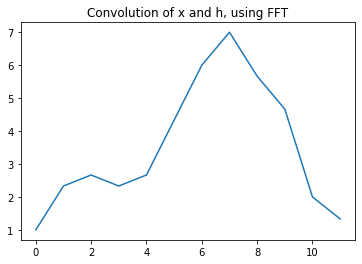

In [6]:
# calculating the ifft of this output will give us our desired result
result = np.fft.ifft(output)
plt.plot(result)
plt.title("Convolution of x and h, using FFT")
plt.show()

In [7]:
# convolution function from assignment 1
def my_convolve(xin, hin):
    # creating output array y with the correct size
    y = np.zeros([xin.size + hin.size - 1])
    
    # reversing smaller array ("flip")
    h = hin[::-1]

    # adding some zeroes to the beginning ("padding") to make convolution easier
    zeros = np.zeros([h.size - 1])
    x = np.concatenate((zeros, xin, zeros))
    
    # iterating through our output y and calculating the value at each index
    # ("shift"), according to the convolution sum
    for i in np.arange(y.size):
        for j in np.arange(h.size):
            y[i] += x[i+j]*h[j]
    
    # return the output array
    return y

In [8]:
# function that performs convolution using FFT, combining the above steps
def fft_convolve(xin, hin):
    # computing the fft of xin and hin, using zero padding so both signals
    # are the same size
    x_fft = np.fft.fft(np.concatenate((x, np.zeros([h.size - 1]))))
    h_fft = np.fft.fft(np.concatenate((h, np.zeros([x.size - 1]))))
    
    # setting data type of output to complex
    output = np.zeros([x.size + h.size - 1], dtype=complex)

    # multiplying in frequency domain
    for i in np.arange(x_fft.size):
        output[i] = x_fft[i] * h_fft[i]
    
    # the desired result is the inverse FT of the above calculation
    return np.fft.ifft(output)

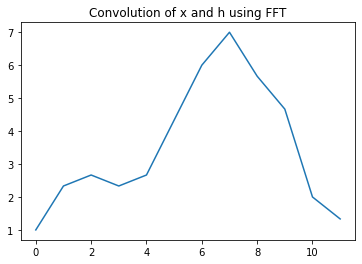

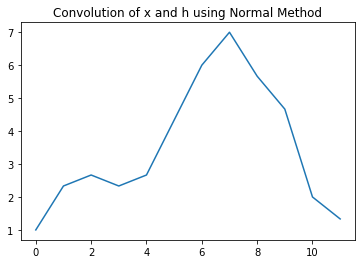

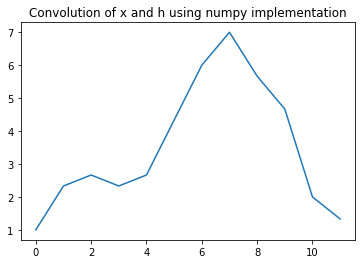

In [9]:
# plotting both convolution functions to show they have the same result

plt.plot(fft_convolve(x, h))
plt.title("Convolution of x and h using FFT")
plt.show()

plt.plot(my_convolve(x, h))
plt.title("Convolution of x and h using Normal Method")
plt.show()

plt.plot(np.convolve(x, h))
plt.title("Convolution of x and h using numpy implementation")
plt.show()

## Part 2: Fourier Transforms

### Part 2a: Taking FFT of specific sound clip

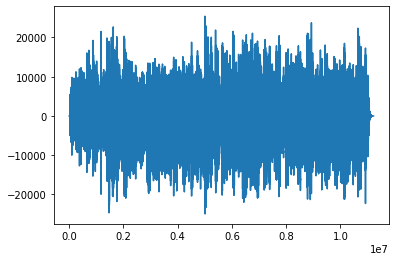

In [10]:
# reading sampling frequency and loading the Corcovado.wav file
fs, corcovado_in = wf.read('Clips\Corcovado.wav')
corcovado = np.array([i[1] for i in corcovado_in]).astype(complex) #float??

# plotting the original audio signal
plt.plot(corcovado)
plt.show()

In [11]:
# function that returns the index in the array corresponding to
# a specified time
def index(f_sample, min, sec):
    # the time of the clip in seconds
    seconds = min * 60 + sec
    return f_sample * seconds

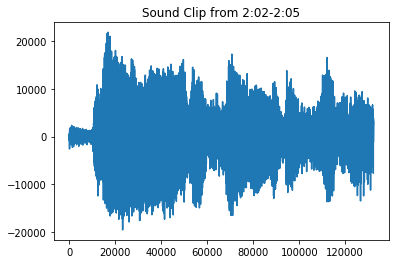

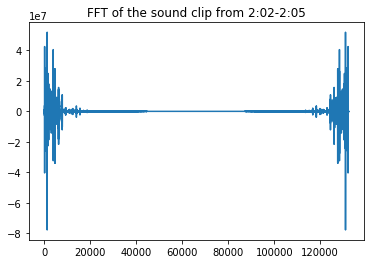

In [12]:
# Extracting the signal from 2:02-2:05
signal = corcovado[index(fs, 2, 2):index(fs, 2, 5)]
plt.plot(signal)
plt.title("Sound Clip from 2:02-2:05")
plt.show()

# taking the fft of this sound clip
fft_clip = np.fft.fft(signal)
plt.plot(fft_clip)
plt.title("FFT of the sound clip from 2:02-2:05")
plt.show()

### Part 2b: DC component and fftshift

In [13]:
dc_component = fft_clip[0]
print("The DC component is", np.absolute(dc_component))
print("DC component is where frequency is 0")

The DC component is 483436.0000000002
DC component is where frequency is 0


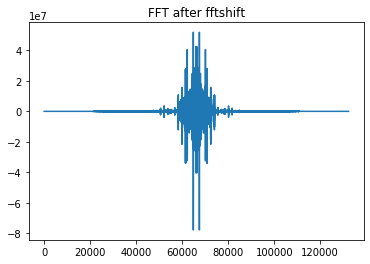

In [14]:
fft_shift = np.fft.fftshift(fft_clip)
plt.plot(fft_shift)
plt.title("FFT after fftshift")
plt.show()

### Part 3c: Dominant frequency in the sound clip

## Part 3: Implement the FFT

### Part 3a: Sampling x(t)

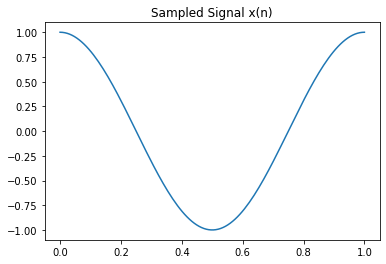

In [15]:
# defining x(t) as given in the problem
def x(t, f):
    return np.cos(2 * np.pi * f * t)

# sampling 128 times in a 1 second interval to get x(n)
t = np.linspace(0, 1, 128)
x_n = x(t, 1)
plt.plot(t, x_n)
plt.title("Sampled Signal x(n)")
plt.show()

This sampling rate is clearly above the Nyquist rate, because it is greater than 2 * 1 Hz, and the original analog signal can be reconstructed from our sampled x(n).

### Part 3b: Computing the N-point DFT

In [16]:
# function that returns the N-point DFT of some input
def n_dft(signal):
    N = signal.size
    
    # creating output array
    output = np.zeros(N, dtype=complex)
    
    # using nested for loop to calculate output values at each index
    for k in np.arange(N):
        for n in np.arange(N):
            term = np.exp(-1j * 2 * np.pi * k * n / N)
            output[k] += signal[n] * term
    
    return output

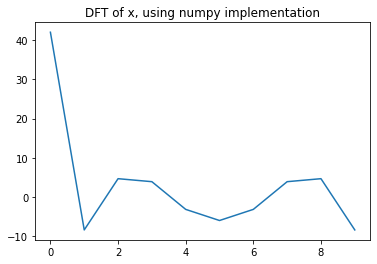

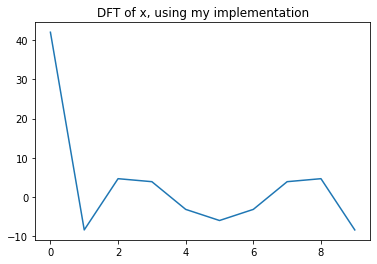

10


In [17]:
# checking N point DFT implementation with the numpy implementation
x = np.array([3, 4, 1, 2, 5, 6, 7, 8, 2, 4])

plt.plot(np.fft.fft(x))
plt.title("DFT of x, using numpy implementation")
plt.show()

plt.plot(n_dft(x))
plt.title("DFT of x, using my implementation")
plt.show()

output = np.zeros(10, dtype=complex)
print(output.size)

### Part 3c: Implementing FFT using Radix-2 Algorithm

In [18]:
# part i: separate() function that separates even and odd indices
# separate(input)[0] gives even indices
# separate(input)[1] gives odd indices
def separate(input):
    # return the even indices (first part), then odd (second part)
    return input[::2], input[1::2]

In [19]:
# part ii: recursive myFFT function that returns the DFT of a signal x
# with length N, using the Radix-2/Cooley-Tukey algorithm
def MyFFT(x, N):
    
    x = x.astype(complex)
    
    # base case
    if (N <= 1):
        return x
    
    else:
        # split input signal using separate() (x1 is even, x2 is odd)
        x1, x2 = separate(x)

        # recursive case (call FFT recursively on odd and even indices)
        x1_fft = MyFFT(x1, N/2) 
        x2_fft = MyFFT(x2, N/2)

        # iterate through the output array, setting values based on the 
        # algorithm given in the problem
        for k in np.arange(N/2).astype(int):
            phase = np.exp(-1j * 2 * np.pi * k / N) * x2_fft[k]
            x[int(k)] = x1_fft[k] + phase
            x[int(k + N/2)] = x1_fft[k] - phase

        # return the final result
        return x

### Part 3d: Compare FFT to DFT (Result)

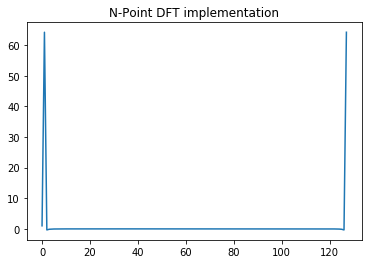

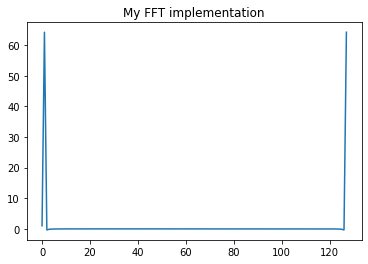

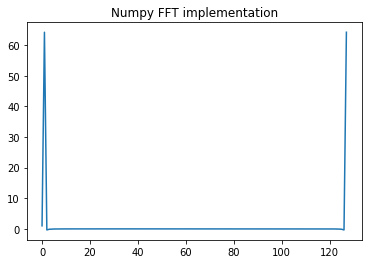

In [20]:
# plotting DFT using function from part b
plt.plot(n_dft(x_n))
plt.title("N-Point DFT implementation")
plt.show()

# plotting FFT using function from part c
plt.plot(MyFFT(x_n, x_n.size))
plt.title("My FFT implementation")
plt.show()

# plotting FFT using numpy implementation
plt.plot(MyFFT(x_n, x_n.size))
plt.title("Numpy FFT implementation")
plt.show()

Clearly, both of my implementations produced the correct result when we compare it to the numpy implementation.

### Part 3e: Compare FFT to DFT (Run-time)

In [21]:
# reading the clip.wav file
fs, clip_in = wf.read('Clips\clip.wav')

# modifying clip to only be the first 8192 points from the first (0) channel
clip = np.array([i[0] for i in clip_in]).astype(float)[0:8192]

C:\Users\ryanm\AppData\Local\conda\conda\envs\myenvname\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


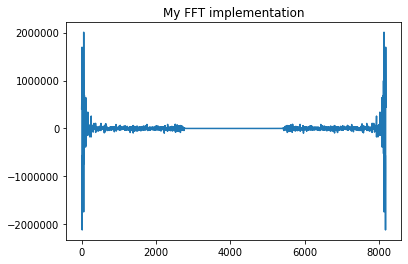

In [22]:
myfft_start_time = time.time()
myFFT_result = MyFFT(clip, clip.size)
myfft_time = time.time() - myfft_start_time

# plotting FFT using function from part c
plt.plot(myFFT_result)
plt.title("My FFT implementation")
plt.show()

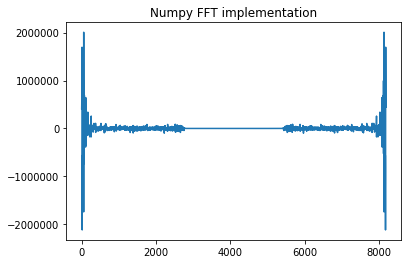

In [23]:
fft_start_time = time.time()
fft_result = np.fft.fft(clip)
fft_time = time.time() - fft_start_time

# plotting DFT using function from part b
plt.plot(fft_result)
plt.title("Numpy FFT implementation")
plt.show()

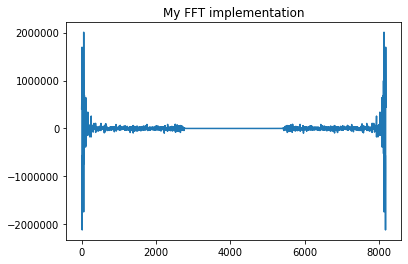

In [24]:
dft_start_time = time.time()
dft_result = n_dft(clip)
dft_time = time.time() - dft_start_time

# plotting DFT using function from part b
plt.plot(dft_result)
plt.title("My FFT implementation")
plt.show()

In [25]:
print("My FFT implementation took", myfft_time, "seconds")

print("Numpy FFT implementation took", fft_time, "seconds")

print("My N-point DFT implementation took", dft_time, "seconds")

My FFT implementation took 0.4488050937652588 seconds
Numpy FFT implementation took 0.0009684562683105469 seconds
My N-point DFT implementation took 539.3254051208496 seconds
